In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, ElasticNetCV
from scipy import stats

#Visualization
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#These columns are no important because of pooling
train = train.drop(columns=["Id"])

print(train.shape, test.shape)

(1460, 80) (1459, 80)


## Data Analysis

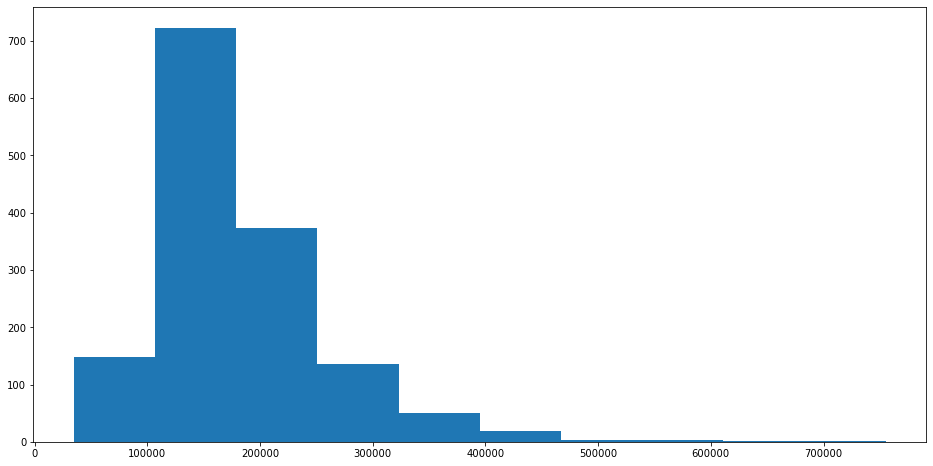

Average Sale Price in Aimes: $ 180921.2
Variation in Sale Price: $ 79415.29


In [3]:
#target variable
y =train["SalePrice"]
fig, ax = plt.subplots(figsize=(16, 8)) 
plt.hist(y)
plt.show()

print(f"Average Sale Price in Aimes: $ {round(np.mean(y),2)}")
print(f"Variation in Sale Price: $ {round(np.std(y),2)}")

In [4]:
X = train.copy()
train.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Create train_clean ==> train
### Create test_clean ==> test

## Domain Knowledge

### seperate columns by types

In [6]:
#Nominal A variable that has no numerical importance, for example color or city.
categorical_columns_labels = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", "Utilities", 
                               "LotConfig",  "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
                              "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
                             "Foundation", "Heating","CentralAir","Functional","PavedDrive","SaleType","SaleCondition"]

#Ordinal A variable that has some order associated with it like our place example above
categorical_columns_ranking = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
                              "BsmtExposure","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond",
                              "PoolQC","Fence"]

#Nominal A variable that has no numerical importance, for example color or city.
categorical_columns_ordinal = ["BsmtFullBath", "BsmtHalfBath", "FullBath",
                              "HalfBath", "BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd", "Fireplaces",
                              "GarageCars","BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
                             "1stFlrSF","2ndFlrSF", "LowQualFinSF","BsmtFullBath"]

categorical_columns_year = ["YearBuilt", "YearRemodAdd", "MoSold","YrSold"]

continious_columns = ["LotArea","GrLivArea", "GarageArea","WoodDeckSF","OpenPorchSF",
                     "EnclosedPorch","3SsnPorch", "ScreenPorch", "PoolArea"]

continous_currency = ["MiscVal"]

## Data Cleaning

In [7]:
from sklearn.impute import SimpleImputer
train = pd.read_csv("train.csv")
train = train.drop(columns=["SalePrice", "Id"])
train_clean = pd.DataFrame([])
test_clean = pd.DataFrame([])

train_col_objs = train.columns[train.dtypes == "object"]
test_col_objs = test.columns[test.dtypes == "object"]

#impute missing values Categorical
imputer  = SimpleImputer(strategy='constant', fill_value='missing')
train_clean[train_col_objs] = imputer.fit_transform(train[train_col_objs])
test_clean[test_col_objs] = imputer.fit_transform(test[test_col_objs])

train_col_objs = train.columns[train.dtypes != "object"]
test_col_objs = train.columns[train.dtypes != "object"]

#impute missing values Variables
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_clean[train_col_objs] = imp_mean.fit_transform(train[train_col_objs])
test_clean[test_col_objs] = imp_mean.fit_transform(test[test_col_objs])

In [8]:
train_clean.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    

## Data Processing

In [9]:
le = preprocessing.LabelEncoder()

train_proc = pd.DataFrame([])

for col in categorical_columns_labels:
    le.fit(train_clean[col])
    train_proc[col] = le.transform(train_clean[col])
    
print(train_proc.shape)
for col in categorical_columns_ordinal:
    le.fit(train_clean[col])
    train_proc[col] = le.transform(train_clean[col]) 
print(train_proc.shape)

for col in categorical_columns_ranking:
    le.fit(train_clean[col])
    train_proc[col] = le.transform(train_clean[col])

scaler = RobustScaler()
scaler.fit(train_clean[continious_columns])
temp_test = pd.DataFrame(scaler.transform(train_clean[continious_columns]), columns=continious_columns)
train_proc[continious_columns] = temp_test[continious_columns]
print(train_proc.shape)


(1460, 24)
(1460, 40)
(1460, 63)


## Visualizing data,
### after converting categorical variables to numerical and fill missing values

<AxesSubplot:>

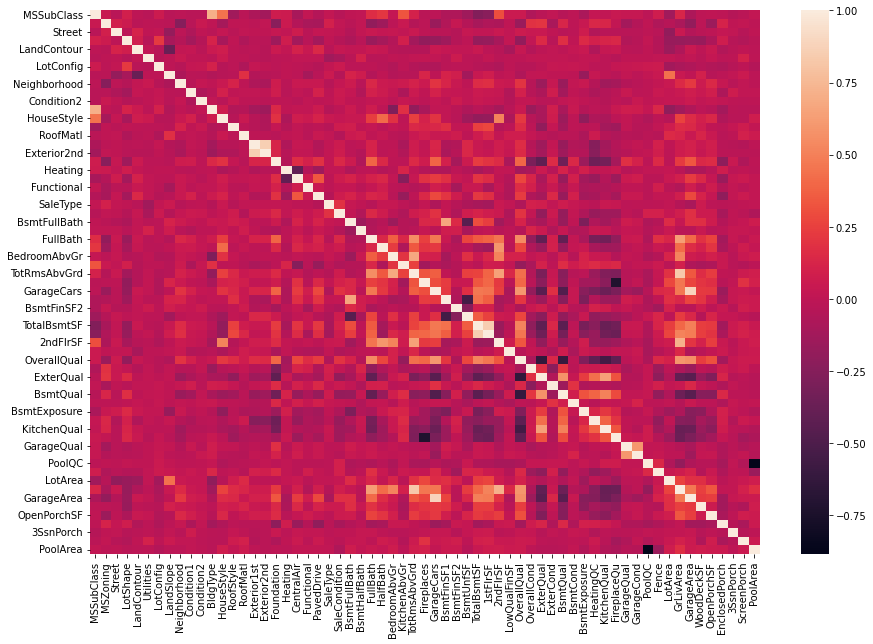

In [10]:
#Look at correlation for continuous variables
plt.figure(figsize=(15,10))
sns.heatmap(train_proc.corr())

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, \
            StackingRegressor
from sklearn.metrics import r2_score,mean_squared_error,RocCurveDisplay, max_error
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.linear_model as lm
from sklearn import tree

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_proc,y, test_size=0.25, random_state=42)

## Random Forest, ADA Boost & Gradient Booster

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
min_val = np.min(clf.feature_importances_[clf.feature_importances_ < 5])
max_val = np.max(clf.feature_importances_)
X_train.columns[np.argwhere(clf.feature_importances_ > 0).reshape(-1)] 

selected_features = X_train.columns[np.argwhere(clf.feature_importances_ > 0).reshape(-1)] 
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

regr = RandomForestRegressor(max_depth=200, random_state=42)
adr = AdaBoostRegressor(n_estimators=200, random_state=42)
gdr = GradientBoostingRegressor(n_estimators=200, random_state=42)

regr.fit(X_train1, y_train)
adr.fit(X_train1, y_train)
gdr.fit(X_train1, y_train)

y_pred_rgr = regr.predict(X_test1)
y_pred_adr = adr.predict(X_test1)
y_pred_gdr = gdr.predict(X_test1)
    
#metrics for exlaining  R^2 adj R^2,  metrics for model performance testing MSE, RMSE, MAE
print(f"RandomForestRegressor: R^2 = {r2_score(y_test, y_pred_rgr)}, max_error={max_error(y_test, y_pred_rgr) }");
print(f"AdaBoostRegressor: R^2 = {r2_score(y_test, y_pred_adr)}, max_error={max_error(y_test, y_pred_adr) }");
print(f"GradientBoostingRegressor: R^2 = {r2_score(y_test, y_pred_gdr)}, max_error={max_error(y_test, y_pred_gdr) }");

RandomForestRegressor: R^2 = 0.8958563624395958, max_error=164129.64
AdaBoostRegressor: R^2 = 0.8480349609278369, max_error=192099.50230414746
GradientBoostingRegressor: R^2 = 0.9141929021478221, max_error=136813.7671536812


## Visualizing Random Forest Model

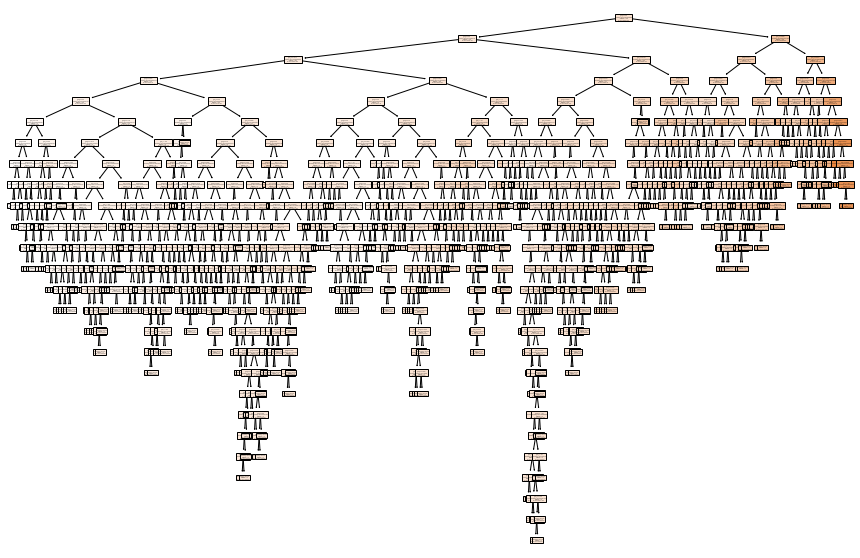

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(regr.estimators_[2], filled=True)
plt.show()

## Visualizing ADA Boost Regression

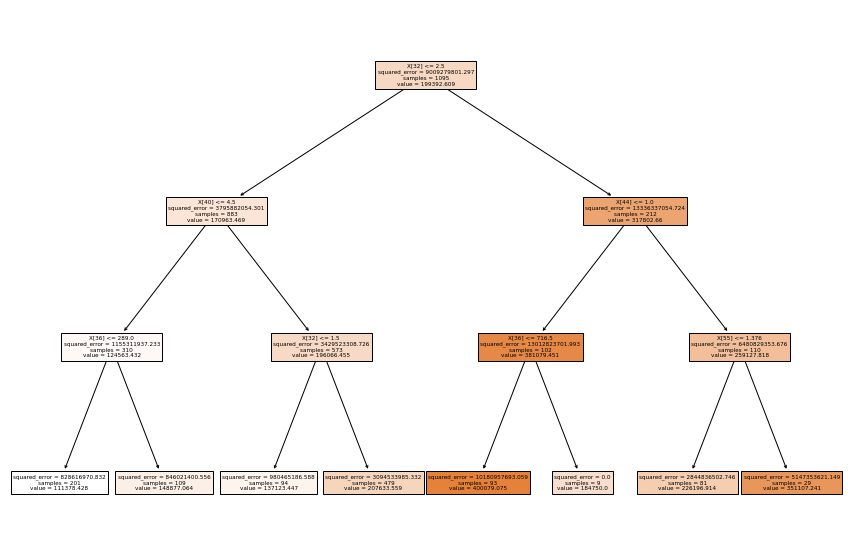

In [18]:
plt.figure(figsize=(15,10))
tree.plot_tree(adr.estimators_[2], filled=True)
plt.show()

## Visualizing GradientBoostingRegressor

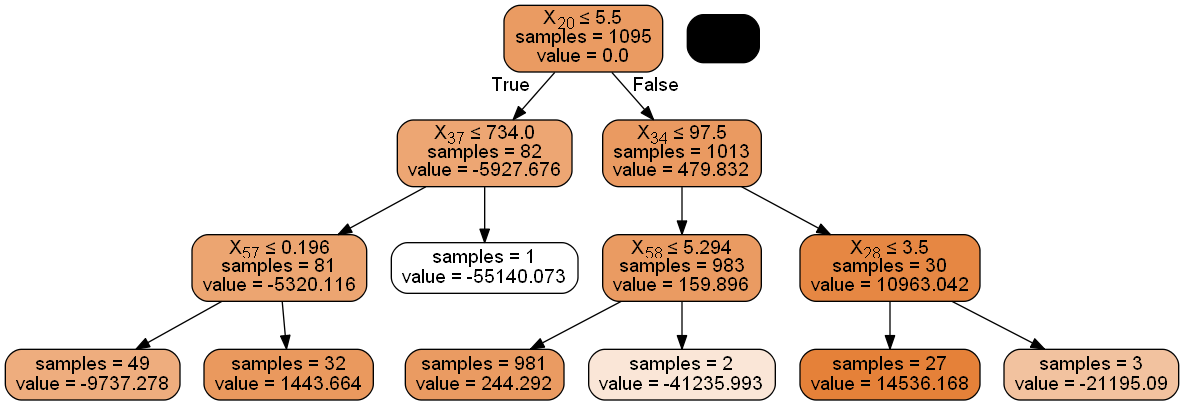

In [21]:
sub_tree_200 = gdr.estimators_[60, 0]
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_200,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

## LASSO CV 

In [88]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42, fit_intercept=False).fit(X_train,y_train)
X_train.columns[lasso.coef_>= 1e-9]
lasso.score(X_train, y_train)
lasso.score(X_test, y_test)

0.6421076383006649

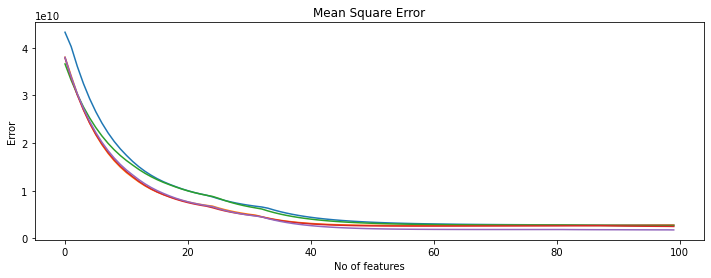

In [89]:
plt.figure(figsize=(12,4))
plt.plot(lasso.mse_path_)
plt.title("Mean Square Error")
plt.xlabel("No of features")
plt.ylabel("Error")
plt.show()


## Elastic Net 

In [90]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(random_state=0)
regr.fit(X_train, y_train)
X_train.columns[regr.coef_>= 1e-9]
regr.score(X_test, y_test)

0.6152178012816247

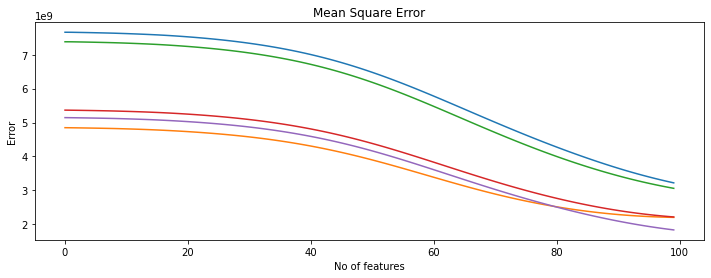

In [91]:
plt.figure(figsize=(12,4))
plt.plot(regr.mse_path_)
plt.title("Mean Square Error")
plt.xlabel("No of features")
plt.ylabel("Error")
plt.show()


## Stacked LASSO CV and Gradient Booster together

In [106]:
estimators = [
    ('lcv', LassoCV(cv=5, random_state=42, fit_intercept=False)),
    ('rf', RandomForestRegressor(n_estimators=10,random_state=42)),
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator= GradientBoostingRegressor(n_estimators=200, random_state=42)
)

reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lcv',
                               LassoCV(cv=5, fit_intercept=False,
                                       random_state=42)),
                              ('rf',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(n_estimators=200,
                                                            random_state=42))

In [107]:
reg.score(X_test, y_test)

0.7596332284997938

In [108]:
reg

StackingRegressor(estimators=[('lcv',
                               LassoCV(cv=5, fit_intercept=False,
                                       random_state=42)),
                              ('rf',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(n_estimators=200,
                                                            random_state=42))

## K-Nearest Neighbor Regression (Not So useful)

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
X_train.columns[lasso.coef_ > 0]

Index(['Neighborhood', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'ScreenPorch'],
      dtype='object')

In [103]:
neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(X_train[X_train.columns[lasso.coef_ > 0]], y_train)
neigh.score(X_test[X_train.columns[lasso.coef_ > 0]], y_test)

0.7126365015902383